In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
cols = ['No of times pregnant', 'Plasma glucose concetration', 'Diastolic BP (mm Hg)', 'Tricep skin fold thickness (mm)', '2Hr serum insulin (mu U/ml)', 'BMI', 'Pedigree function', 'Age', 'Class']

In [3]:
data = pd.read_csv('pima-indians-diabetes.csv', names=cols)
data = data.iloc[9:, :]
data

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age,Class
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [4]:
data.columns

Index(['No of times pregnant', 'Plasma glucose concetration',
       'Diastolic BP (mm Hg)', 'Tricep skin fold thickness (mm)',
       '2Hr serum insulin (mu U/ml)', 'BMI', 'Pedigree function', 'Age',
       'Class'],
      dtype='object')

In [5]:
data.isnull().sum()

No of times pregnant               0
Plasma glucose concetration        3
Diastolic BP (mm Hg)               1
Tricep skin fold thickness (mm)    1
2Hr serum insulin (mu U/ml)        1
BMI                                2
Pedigree function                  1
Age                                0
Class                              0
dtype: int64

In [6]:
num_cols = data.select_dtypes(include='number')
means = num_cols.mean()
data = data.fillna(means)
data.isnull().sum()

No of times pregnant               0
Plasma glucose concetration        0
Diastolic BP (mm Hg)               0
Tricep skin fold thickness (mm)    0
2Hr serum insulin (mu U/ml)        0
BMI                                0
Pedigree function                  0
Age                                0
Class                              0
dtype: int64

In [9]:
data

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age,Class
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [8]:
sub1 = data.iloc[:300, :]
sub2 = data.iloc[400:570, :]

In [9]:
row_merge_data = pd.concat([sub1, sub2], axis=0)
row_merge_data

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age,Class
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
574,2,95.0,54.0,14.0,88.0,26.1,0.748,22.0,0.0
575,1,99.0,72.0,30.0,18.0,38.6,0.412,21.0,0.0
576,6,92.0,62.0,32.0,126.0,32.0,0.085,46.0,0.0
577,4,154.0,72.0,29.0,126.0,31.3,0.338,37.0,0.0


In [10]:
x = row_merge_data.iloc[:, 0:8]
x

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age
9,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0
10,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0
11,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0
12,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
13,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
574,2,95.0,54.0,14.0,88.0,26.1,0.748,22.0
575,1,99.0,72.0,30.0,18.0,38.6,0.412,21.0
576,6,92.0,62.0,32.0,126.0,32.0,0.085,46.0
577,4,154.0,72.0,29.0,126.0,31.3,0.338,37.0


In [11]:
y = row_merge_data.iloc[:, -1]
y

9      1.0
10     0.0
11     1.0
12     0.0
13     1.0
      ... 
574    0.0
575    0.0
576    0.0
577    0.0
578    1.0
Name: Class, Length: 470, dtype: float64

<AxesSubplot:>

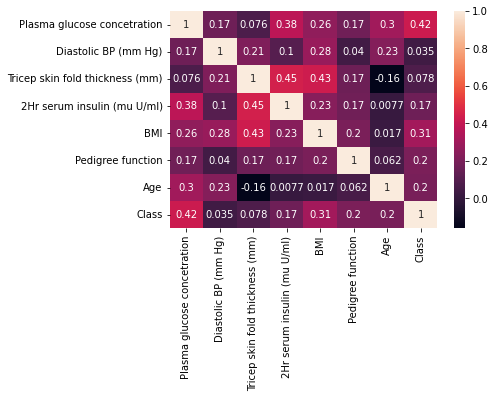

In [12]:
sns.heatmap(row_merge_data.corr(), annot=True)

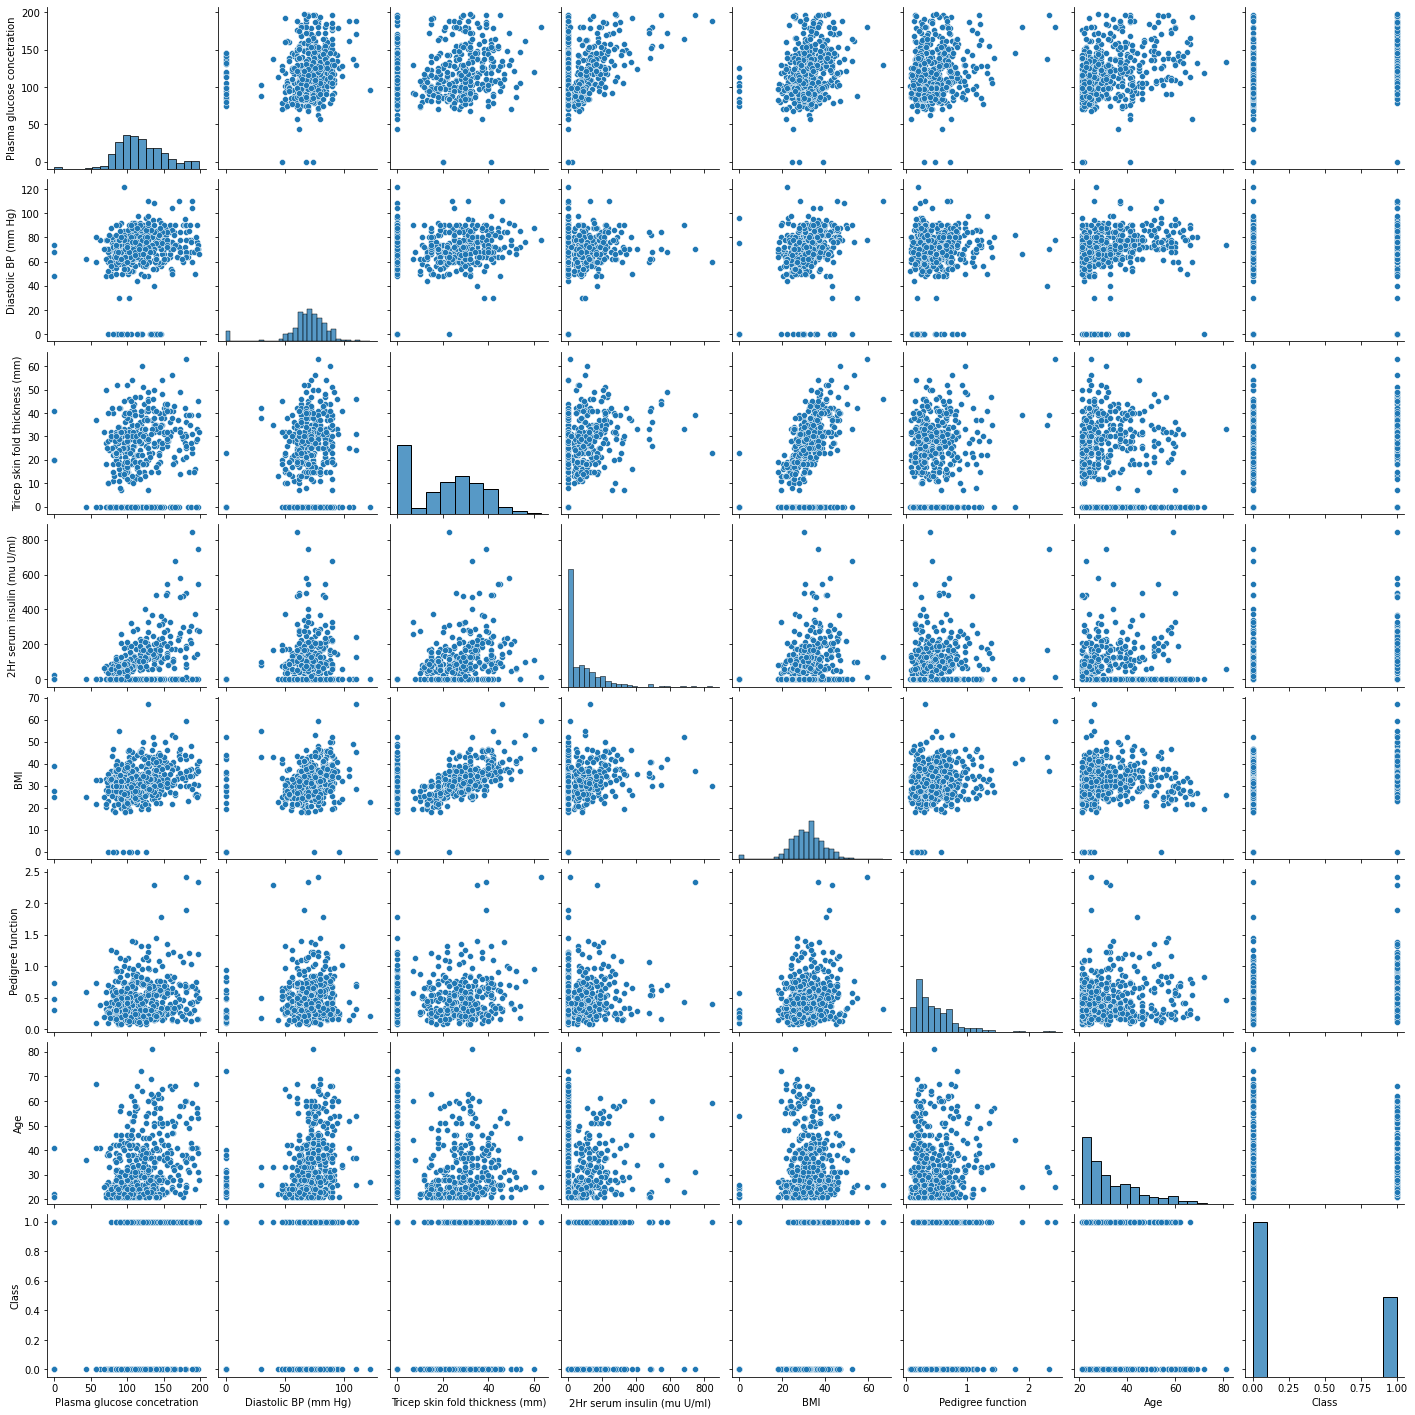

In [13]:
sns.pairplot(row_merge_data)

<AxesSubplot:xlabel='Class', ylabel='Age'>

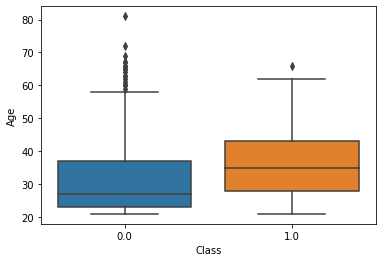

In [14]:
sns.boxplot(data = row_merge_data, y = row_merge_data['Age'], x = row_merge_data['Class'])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [16]:
x_train

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age
103,2,142.0,82.0,18.0,64.0,24.7,0.761,21.0
296,1,119.0,86.0,39.0,220.0,45.6,0.808,29.0
478,6,154.0,78.0,41.0,140.0,46.1,0.571,27.0
433,8,151.0,78.0,32.0,210.0,42.9,0.516,36.0
423,0,138.0,60.0,35.0,167.0,34.6,0.534,21.0
...,...,...,...,...,...,...,...,...
115,1,96.0,122.0,0.0,0.0,22.4,0.207,27.0
279,10,101.0,86.0,37.0,0.0,45.6,1.136,38.0
457,0,104.0,64.0,37.0,64.0,33.6,0.510,22.0
544,4,132.0,0.0,0.0,0.0,32.9,0.302,23.0


In [17]:
x_test

,No of times pregnant,Plasma glucose concetration,Diastolic BP (mm Hg),Tricep skin fold thickness (mm),2Hr serum insulin (mu U/ml),BMI,Pedigree function,Age
64,1,73.0,50.0,10.0,0.0,23.0,0.248,21.0
82,4,129.0,86.0,20.0,270.0,35.1,0.231,23.0
42,6,92.0,92.0,0.0,0.0,19.9,0.188,28.0
555,5,187.0,76.0,27.0,207.0,43.6,1.034,53.0
534,3,87.0,60.0,18.0,0.0,21.8,0.444,21.0
...,...,...,...,...,...,...,...,...
93,5,137.0,108.0,0.0,0.0,48.8,0.227,37.0
432,2,115.0,64.0,22.0,0.0,30.8,0.421,21.0
271,4,95.0,70.0,32.0,0.0,32.1,0.612,24.0
208,4,148.0,60.0,27.0,318.0,30.9,0.150,29.0


In [18]:
d_tree = tree.DecisionTreeClassifier()
d_tree

DecisionTreeClassifier()

In [19]:
d_tree = d_tree.fit(x_train, y_train)

In [20]:
y_pred = d_tree.predict(x_test)

<AxesSubplot:>

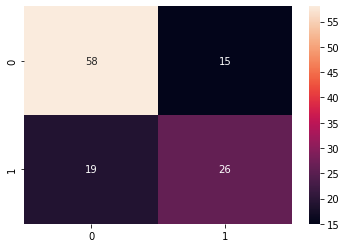

In [29]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        73
         1.0       0.63      0.58      0.60        45

    accuracy                           0.71       118
   macro avg       0.69      0.69      0.69       118
weighted avg       0.71      0.71      0.71       118



In [22]:
accuracy_score(y_test, y_pred)

0.711864406779661

In [30]:
sample = x_test.iloc[7, :]
sample

No of times pregnant                   8
Plasma glucose concetration        125.0
Diastolic BP (mm Hg)                96.0
Tricep skin fold thickness (mm)      0.0
2Hr serum insulin (mu U/ml)          0.0
BMI                                  0.0
Pedigree function                  0.232
Age                                 54.0
Name: 18, dtype: object